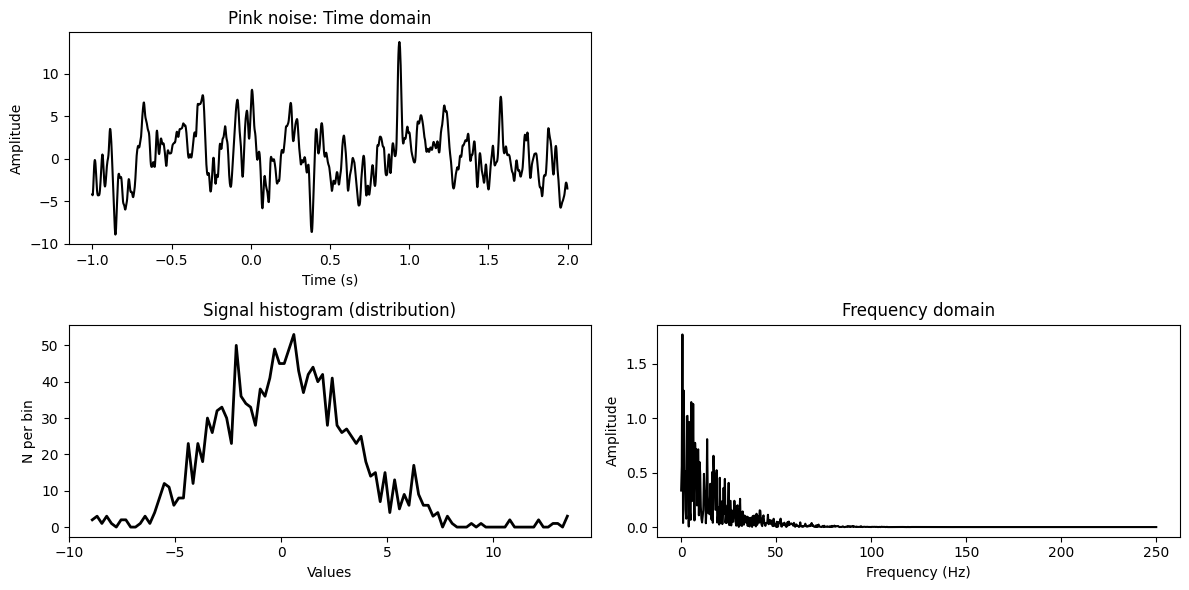

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import ifft

# نرخ نمونه‌برداری و تولید بردار زمان
srate = 500  # نرخ نمونه‌برداری در هرتز
time = np.arange(-1, 2, 1/srate)  # بردار زمان
pnts = len(time)  # تعداد نمونه‌ها

# اطمینان از تعداد صحیح نقاط
if pnts % 2 == 1:
    time = time[:-1]  # حذف مقدار اضافی در صورت نیاز
    pnts = len(time)  # بروزرسانی مقدار pnts

# تولید طیف دامنه 1/f برای نویز صورتی
hz = np.linspace(0, srate/2, int(np.floor(pnts/2) + 1))
ed = 50  # پارامتر کاهش نمایی
asym = np.random.rand(pnts // 2 - 1) * np.exp(-np.arange(1, pnts // 2) / ed)
asym = np.concatenate(([asym[0]], asym, [0, 0], asym[::-1]))

# ضرایب فوریه
fc = asym * np.exp(1j * 2 * np.pi * np.random.rand(len(asym)))

# تبدیل فوریه معکوس برای تولید نویز صورتی
noise = np.real(ifft(fc)) * pnts

# اطمینان از یکسان بودن طول آرایه‌ها
noise = noise[:pnts]  # حذف مقدار اضافی نویز در صورت لزوم

# نمایش نویز صورتی
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(time, noise, 'k')
plt.title('Pink noise: Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 3)
y, x = np.histogram(noise, bins=100)
plt.plot(x[:-1], y, 'k', linewidth=2)
plt.title('Signal histogram (distribution)')
plt.xlabel('Values')
plt.ylabel('N per bin')

plt.subplot(2, 2, 4)
amp = np.abs(np.fft.fft(noise) / pnts)
amp[1:] = 2 * amp[1:]  # اصلاح دامنه
plt.plot(hz, amp[:len(hz)], 'k')
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


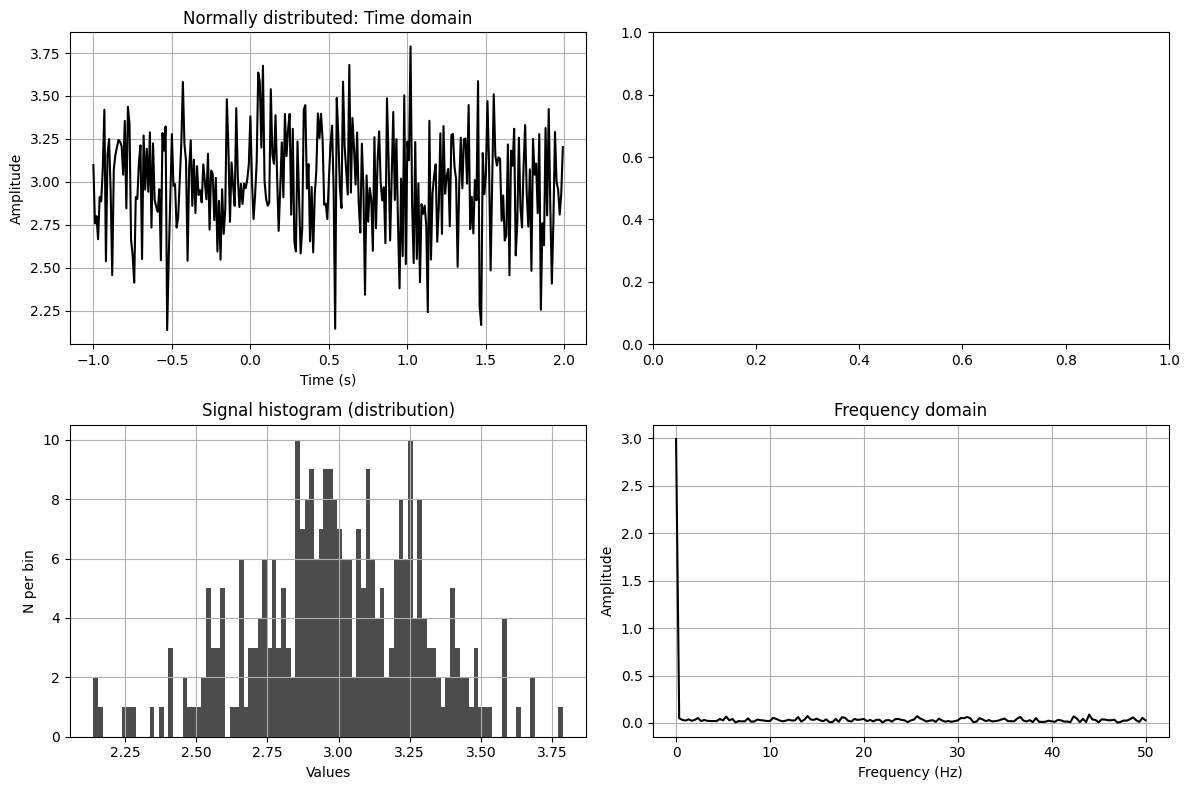

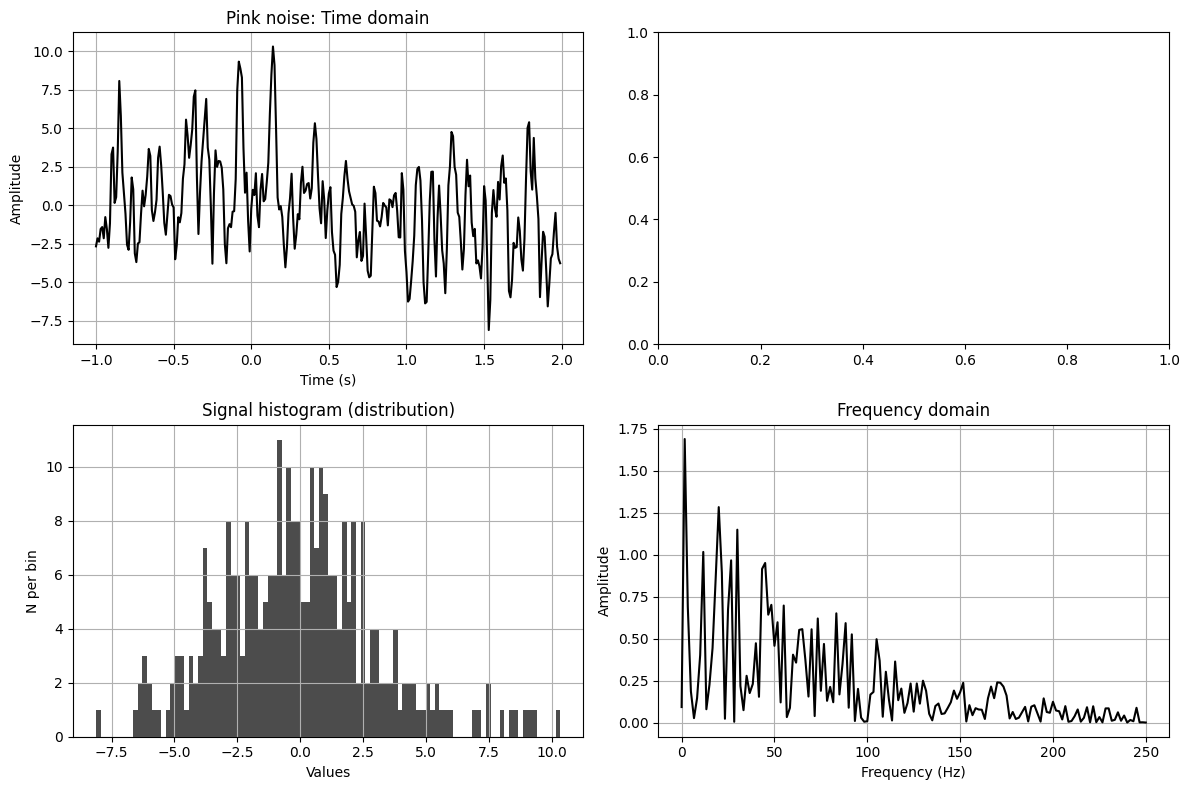

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation details
srate = 100  # Sampling rate in Hz
time = np.arange(-1, 2, 1/srate)
pnts = len(time)

# Noise parameters
stretch = 0.3  # Stretch factor
shift = 3      # Shift factor

# Generate random noise
noise = stretch * np.random.randn(len(time)) + shift

# Compute FFT for frequency analysis
hz = np.linspace(0, srate/2, int(len(time)/2) + 1)
amp = np.abs(np.fft.fft(noise) / pnts)
amp[1:] = 2 * amp[1:]

# Plot the results
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Time-domain plot
ax[0, 0].plot(time, noise, 'k')
ax[0, 0].set_title('Normally distributed: Time domain')
ax[0, 0].set_xlabel('Time (s)')
ax[0, 0].set_ylabel('Amplitude')
ax[0, 0].grid()

# Histogram plot
ax[1, 0].hist(noise, bins=100, color='k', alpha=0.7)
ax[1, 0].set_title('Signal histogram (distribution)')
ax[1, 0].set_xlabel('Values')
ax[1, 0].set_ylabel('N per bin')
ax[1, 0].grid()

# Frequency-domain plot
ax[1, 1].plot(hz, amp[:len(hz)], 'k')
ax[1, 1].set_title('Frequency domain')
ax[1, 1].set_xlabel('Frequency (Hz)')
ax[1, 1].set_ylabel('Amplitude')
ax[1, 1].grid()

plt.tight_layout()
plt.show()

# Pink noise (1/f noise) generation
srate = 500  # New sampling rate
pnts = len(time)
hz = np.linspace(0, srate/2, int(len(time)/2) + 1)

# Generate 1/f amplitude spectrum
ed = 50  # Exponential decay parameter
as_ = np.random.rand(int(pnts/2)-1) * np.exp(-np.arange(1, int(pnts/2)) / ed)
as_ = np.concatenate(([as_[0]], as_, [0, 0], as_[::-1]))

# Fourier coefficients
fc = as_ * np.exp(1j * 2 * np.pi * np.random.rand(len(as_)))

# Inverse Fourier Transform to create pink noise
pink_noise = np.real(np.fft.ifft(fc)) * pnts

# Compute FFT for pink noise
amp_pink = np.abs(np.fft.fft(pink_noise) / pnts)
amp_pink[1:] = 2 * amp_pink[1:]

# Plot pink noise results
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Ensure both arrays have the same length
time = time[:min(len(time), len(pink_noise))]
pink_noise = pink_noise[:min(len(time), len(pink_noise))]

# Now plot
ax[0, 0].plot(time, pink_noise, 'k')
ax[0, 0].set_title('Pink noise: Time domain')
ax[0, 0].set_xlabel('Time (s)')
# Time-domain plot
ax[0, 0].set_ylabel('Amplitude')
ax[0, 0].grid()

# Histogram plot
ax[1, 0].hist(pink_noise, bins=100, color='k', alpha=0.7)
ax[1, 0].set_title('Signal histogram (distribution)')
ax[1, 0].set_xlabel('Values')
ax[1, 0].set_ylabel('N per bin')
ax[1, 0].grid()

# Frequency-domain plot
ax[1, 1].plot(hz, amp_pink[:len(hz)], 'k')
ax[1, 1].set_title('Frequency domain')
ax[1, 1].set_xlabel('Frequency (Hz)')
ax[1, 1].set_ylabel('Amplitude')
ax[1, 1].grid()

plt.tight_layout()
plt.show()


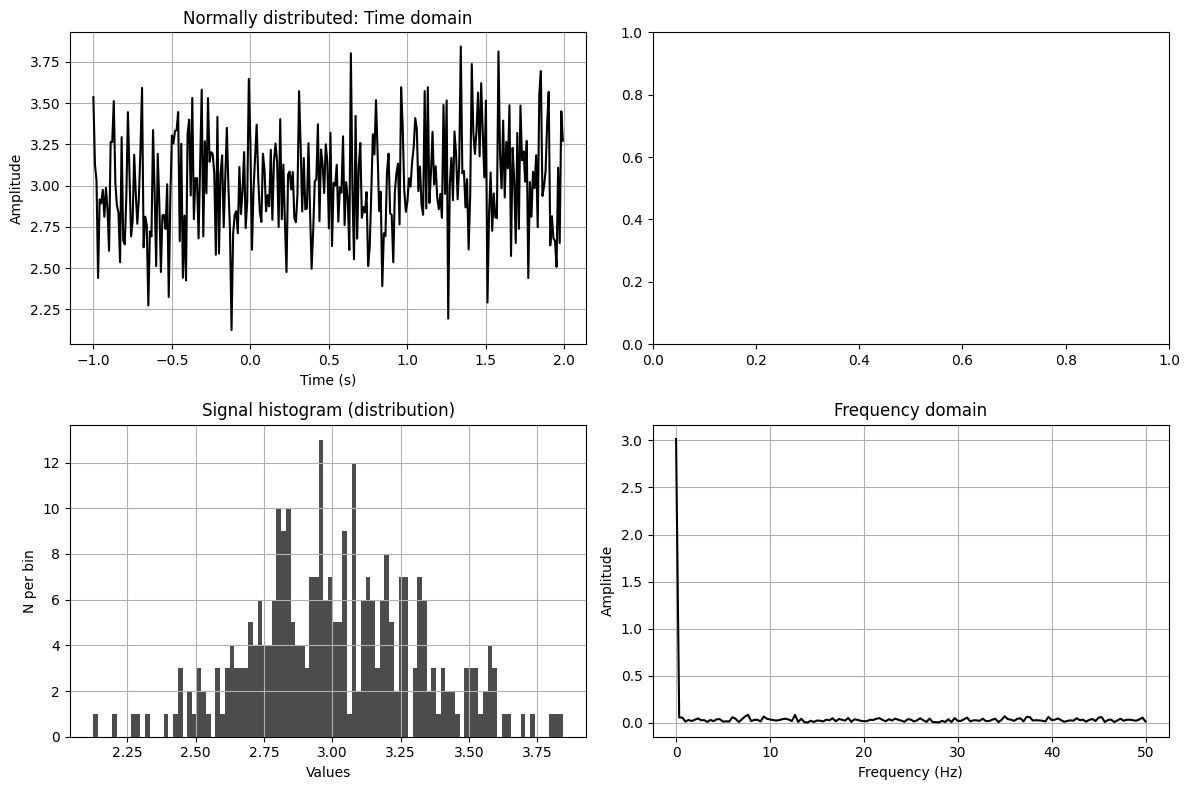

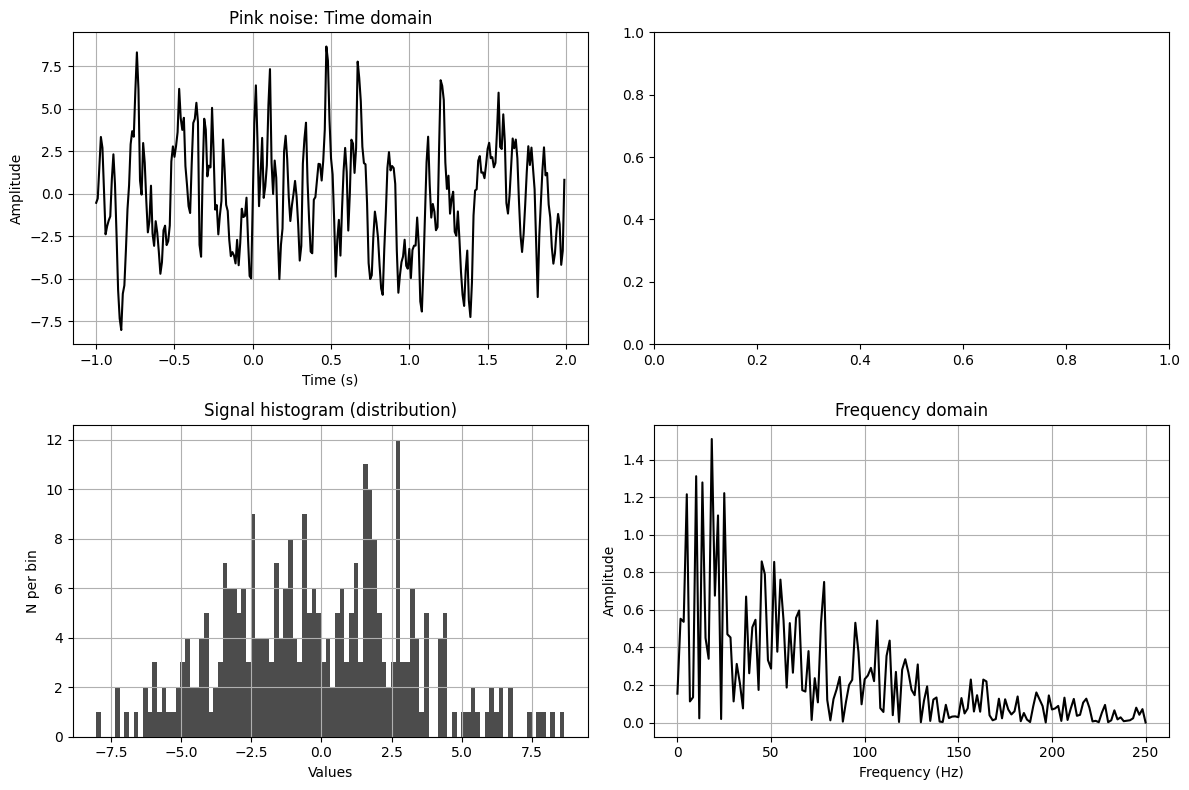

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed to ensure reproducibility
np.random.seed(3)

# Simulation details
srate = 100  # Sampling rate in Hz
time = np.arange(-1, 2, 1/srate)
pnts = len(time)

# Noise parameters
stretch = 0.3  # Stretch factor
shift = 3      # Shift factor

# Generate random noise
noise = stretch * np.random.randn(len(time)) + shift

# Compute FFT for frequency analysis
hz = np.linspace(0, srate/2, int(len(time)/2) + 1)
amp = np.abs(np.fft.fft(noise) / pnts)
amp[1:] = 2 * amp[1:]

# Plot the results
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Time-domain plot
ax[0, 0].plot(time, noise, 'k')
ax[0, 0].set_title('Normally distributed: Time domain')
ax[0, 0].set_xlabel('Time (s)')
ax[0, 0].set_ylabel('Amplitude')
ax[0, 0].grid()

# Histogram plot
ax[1, 0].hist(noise, bins=100, color='k', alpha=0.7)
ax[1, 0].set_title('Signal histogram (distribution)')
ax[1, 0].set_xlabel('Values')
ax[1, 0].set_ylabel('N per bin')
ax[1, 0].grid()

# Frequency-domain plot
ax[1, 1].plot(hz, amp[:len(hz)], 'k')
ax[1, 1].set_title('Frequency domain')
ax[1, 1].set_xlabel('Frequency (Hz)')
ax[1, 1].set_ylabel('Amplitude')
ax[1, 1].grid()

plt.tight_layout()
plt.show()

# Pink noise (1/f noise) generation
srate = 500  # New sampling rate
pnts = len(time)
hz = np.linspace(0, srate/2, int(len(time)/2) + 1)

# Generate 1/f amplitude spectrum
ed = 50  # Exponential decay parameter
as_ = np.random.rand(int(pnts/2)-1) * np.exp(-np.arange(1, int(pnts/2)) / ed)
as_ = np.concatenate(([as_[0]], as_, [0, 0], as_[::-1]))

# Fourier coefficients
fc = as_ * np.exp(1j * 2 * np.pi * np.random.rand(len(as_)))

# Inverse Fourier Transform to create pink noise
pink_noise = np.real(np.fft.ifft(fc)) * pnts

# Compute FFT for pink noise
amp_pink = np.abs(np.fft.fft(pink_noise) / pnts)
amp_pink[1:] = 2 * amp_pink[1:]

# Plot pink noise results
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Ensure both arrays have the same length
time = time[:min(len(time), len(pink_noise))]
pink_noise = pink_noise[:min(len(time), len(pink_noise))]

# Now plot
ax[0, 0].plot(time, pink_noise, 'k')
ax[0, 0].set_title('Pink noise: Time domain')
ax[0, 0].set_xlabel('Time (s)')
# Time-domain plot
ax[0, 0].set_ylabel('Amplitude')
ax[0, 0].grid()

# Histogram plot
ax[1, 0].hist(pink_noise, bins=100, color='k', alpha=0.7)
ax[1, 0].set_title('Signal histogram (distribution)')
ax[1, 0].set_xlabel('Values')
ax[1, 0].set_ylabel('N per bin')
ax[1, 0].grid()

# Frequency-domain plot
ax[1, 1].plot(hz, amp_pink[:len(hz)], 'k')
ax[1, 1].set_title('Frequency domain')
ax[1, 1].set_xlabel('Frequency (Hz)')
ax[1, 1].set_ylabel('Amplitude')
ax[1, 1].grid()

plt.tight_layout()
plt.show()


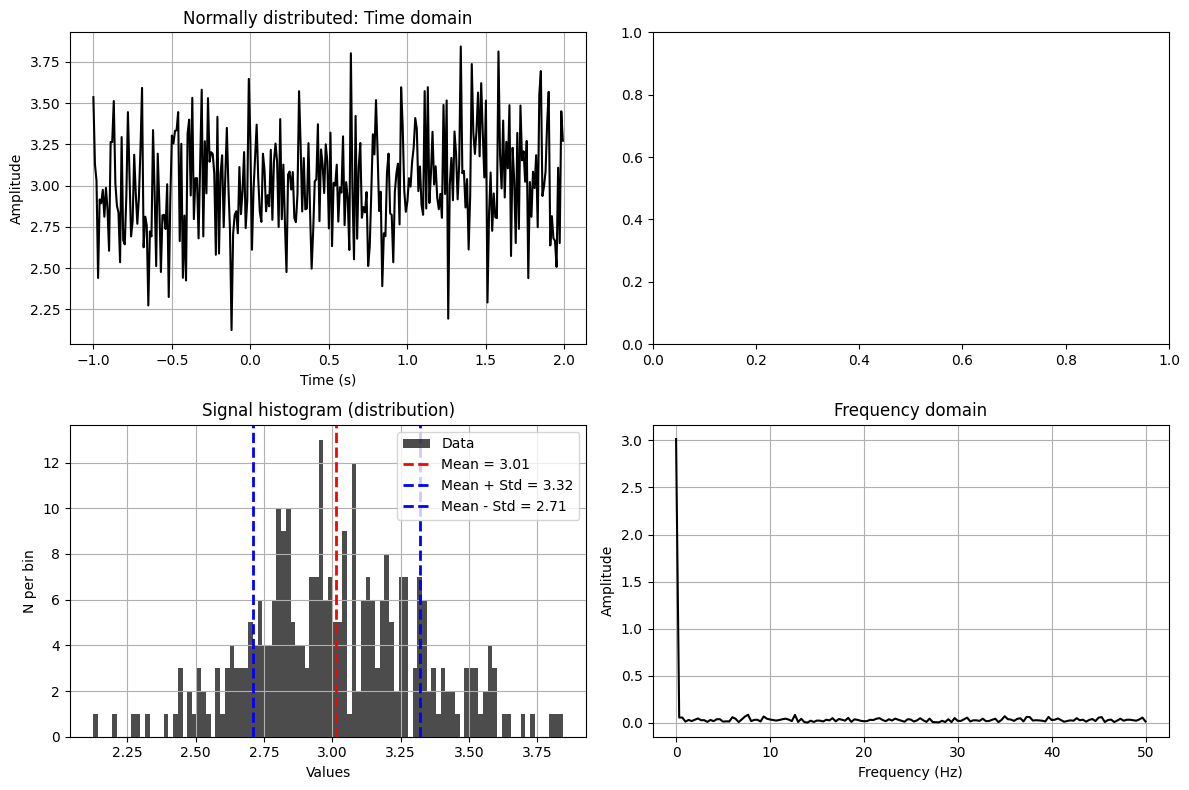

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# تنظیم مقدار تصادفی برای تولید نویز یکسان در اجراهای مختلف
np.random.seed(3)

# مشخصات سیگنال
srate = 100  # نرخ نمونه‌برداری (Hz)
time = np.arange(-1, 2, 1/srate)
pnts = len(time)

# پارامترهای نویز
stretch = 0.3  # مقیاس‌دهی نویز (تأثیر روی انحراف معیار)
shift = 3      # جابه‌جایی نویز (تأثیر روی میانگین)

# تولید نویز نرمال
noise = stretch * np.random.randn(len(time)) + shift

# محاسبه مقدار میانگین و انحراف معیار
mean_noise = np.mean(noise)
std_noise = np.std(noise)

# محاسبه طیف فرکانسی
hz = np.linspace(0, srate/2, int(len(time)/2) + 1)
amp = np.abs(np.fft.fft(noise) / pnts)
amp[1:] = 2 * amp[1:]

# رسم نمودارها
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# نمودار حوزه زمان (Time domain)
ax[0, 0].plot(time, noise, 'k')
ax[0, 0].set_title('Normally distributed: Time domain')
ax[0, 0].set_xlabel('Time (s)')
ax[0, 0].set_ylabel('Amplitude')
ax[0, 0].grid()

# نمودار هیستوگرام (توزیع مقادیر سیگنال)
ax[1, 0].hist(noise, bins=100, color='k', alpha=0.7, label='Data')
ax[1, 0].axvline(mean_noise, color='r', linestyle='dashed', linewidth=2, label=f'Mean = {mean_noise:.2f}')
ax[1, 0].axvline(mean_noise + std_noise, color='b', linestyle='dashed', linewidth=2, label=f'Mean + Std = {mean_noise + std_noise:.2f}')
ax[1, 0].axvline(mean_noise - std_noise, color='b', linestyle='dashed', linewidth=2, label=f'Mean - Std = {mean_noise - std_noise:.2f}')
ax[1, 0].set_title('Signal histogram (distribution)')
ax[1, 0].set_xlabel('Values')
ax[1, 0].set_ylabel('N per bin')
ax[1, 0].legend()
ax[1, 0].grid()

# نمودار حوزه فرکانس (Frequency domain)
ax[1, 1].plot(hz, amp[:len(hz)], 'k')
ax[1, 1].set_title('Frequency domain')
ax[1, 1].set_xlabel('Frequency (Hz)')
ax[1, 1].set_ylabel('Amplitude')
ax[1, 1].grid()

plt.tight_layout()
plt.show()


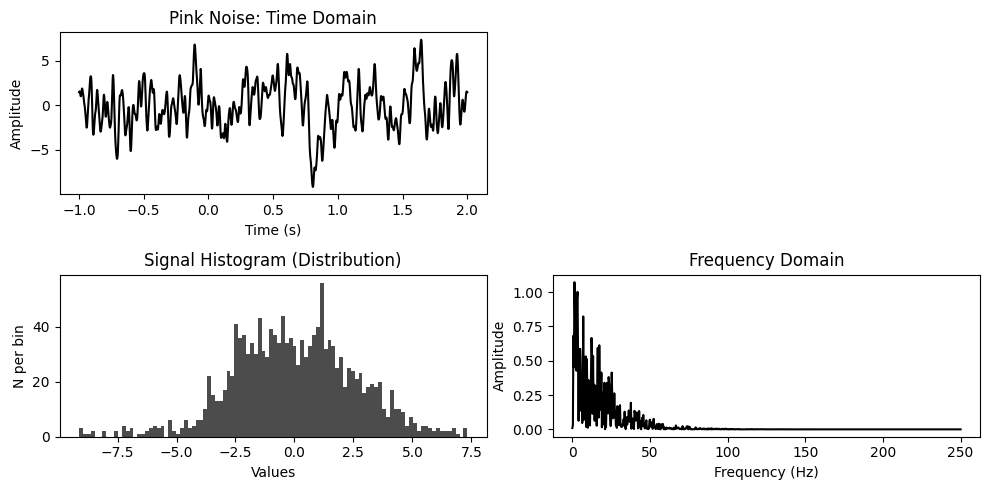

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# تنظیمات شبیه‌سازی
srate = 500  # نرخ نمونه‌برداری (Hz)
time  = np.linspace(-1, 2, 1501)  # ایجاد 1501 مقدار برای سازگاری با noise
pnts  = len(time)  # تعداد نقاط
hz    = np.linspace(0, srate/2, int(pnts/2)+1)  # بردار فرکانس

# تولید طیف دامنه 1/f
ed = 50  # پارامتر کاهش نمایی
aspectrum = np.random.rand(int(pnts/2)-1) * np.exp(-np.arange(1, int(pnts/2))/ed)
aspectrum = np.concatenate(([aspectrum[0]], aspectrum, [0, 0], aspectrum[::-1]))

# ضرایب فوریه
fc = aspectrum * np.exp(1j * 2 * np.pi * np.random.rand(len(aspectrum)))

# تبدیل فوریه معکوس برای تولید نویز
noise = np.real(np.fft.ifft(fc)) * pnts

# کوتاه کردن نویز به اندازه time (در صورت نیاز)
noise = noise[:len(time)]  # در صورتی که طول آن یک مقدار بیشتر باشد

# نمایش نتایج
plt.figure(figsize=(10,5))

# نمودار حوزه زمان
plt.subplot(2,2,1)
plt.plot(time, noise, 'k')
plt.xlabel('Time (s)'), plt.ylabel('Amplitude')
plt.title('Pink Noise: Time Domain')

# نمودار هیستوگرام سیگنال
plt.subplot(2,2,3)
plt.hist(noise, bins=100, color='k', alpha=0.7)
plt.xlabel('Values'), plt.ylabel('N per bin')
plt.title('Signal Histogram (Distribution)')

# نمودار حوزه فرکانس
amp = np.abs(np.fft.fft(noise) / pnts)
amp[1:] = 2 * amp[1:]  # اصلاح دامنه برای نمایش بهتر
plt.subplot(2,2,4)
plt.plot(hz, amp[:len(hz)], 'k')
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude')
plt.title('Frequency Domain')

plt.tight_layout()
plt.show()


## **نویز سفید گاوسی دارای طیف فرکانسی یکنواخت است، در حالی که نویز صورتی در فرکانس‌های پایین انرژی بیشتری دارد.**

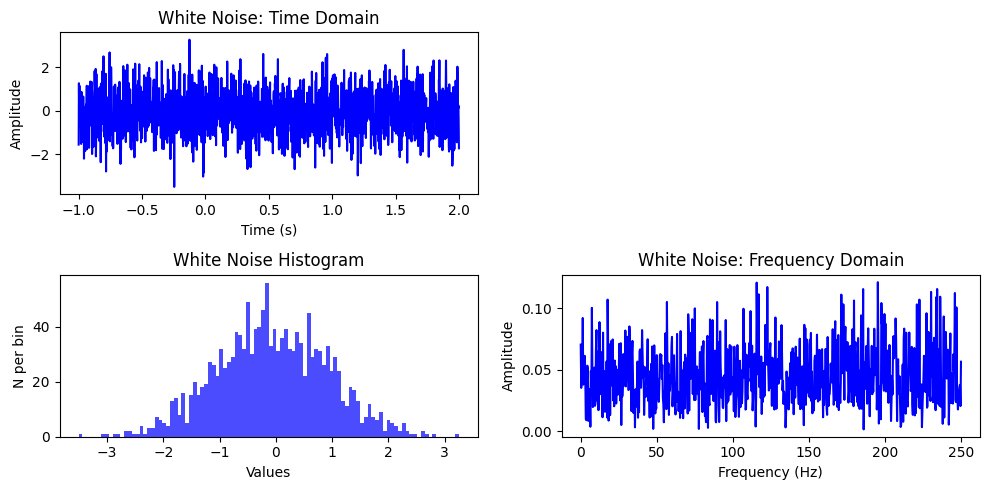

In [11]:
white_noise = np.random.randn(pnts)  # نویز سفید گاوسی

plt.figure(figsize=(10,5))

# نمودار حوزه زمان برای نویز سفید
plt.subplot(2,2,1)
plt.plot(time, white_noise, 'b')
plt.xlabel('Time (s)'), plt.ylabel('Amplitude')
plt.title('White Noise: Time Domain')

# نمودار هیستوگرام
plt.subplot(2,2,3)
plt.hist(white_noise, bins=100, color='b', alpha=0.7)
plt.xlabel('Values'), plt.ylabel('N per bin')
plt.title('White Noise Histogram')

# نمودار حوزه فرکانس
amp_white = np.abs(np.fft.fft(white_noise) / pnts)
amp_white[1:] = 2 * amp_white[1:]
plt.subplot(2,2,4)
plt.plot(hz, amp_white[:len(hz)], 'b')
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude')
plt.title('White Noise: Frequency Domain')

plt.tight_layout()
plt.show()
